### Data Dictionary

When purchasing a car, one might be interested in the car's city-cycle fuel consumption. The dataset in the problem includes the city-cycle fuel consumption in miles per gallon for different cars along with the cars' attributes. The following are the cars' attributes given in the data:

- car_name
- cylinders
- displacement
- horsepower
- weight
- acceleration
- model_year


The car_name is not unique to each observation. The model_year is the year in which the car was built in the 20th century. For example, if the car was built in 1970, its model_year will be 70. The data includes one more variable, mpg, which will be the dependent variable.

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor
from xgboost import to_graphviz, plot_importance

from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import _hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor, HistGradientBoostingRegressor

%matplotlib inline
sns.set_style('dark')
sns.set(font_scale=1.5)

from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, mean_squared_error,r2_score
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve, accuracy_score
from sklearn.metrics import auc, f1_score, precision_score, recall_score, roc_auc_score

import feature_engine.missing_data_imputers as mdi
from feature_engine.outlier_removers import Winsorizer

from tpot import TPOTClassifier, TPOTRegressor

import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns= None
#pd.options.display.max_rows = None

### Data Exploration

In [2]:
df = pd.read_csv("mpg.csv")

In [3]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,car_name
0,18.0,6,258.0,110.0,2962,13.5,71,amc hornet sportabout (sw)
1,34.0,4,108.0,70.0,2245,16.9,82,toyota corolla
2,18.2,8,318.0,135.0,3830,15.2,79,dodge st. regis
3,32.3,4,97.0,67.0,2065,17.8,81,subaru
4,14.0,8,400.0,175.0,4385,12.0,72,pontiac catalina
...,...,...,...,...,...,...,...,...
393,36.0,4,98.0,70.0,2125,17.3,82,mercury lynx l
394,25.0,6,181.0,110.0,2945,16.4,82,buick century limited
395,36.0,4,135.0,84.0,2370,13.0,82,dodge charger 2.2
396,44.0,4,97.0,52.0,2130,24.6,82,vw pickup


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   car_name      398 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 25.0+ KB


In [5]:
df.describe(include='all')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,car_name
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,305
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ford pinto
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,NaN
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,NaN
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,NaN
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,NaN
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,NaN
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,NaN


In [6]:
df.shape

(398, 8)

In [7]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'car_name'],
      dtype='object')

### Data Visualization

### Univariate Data Exploration

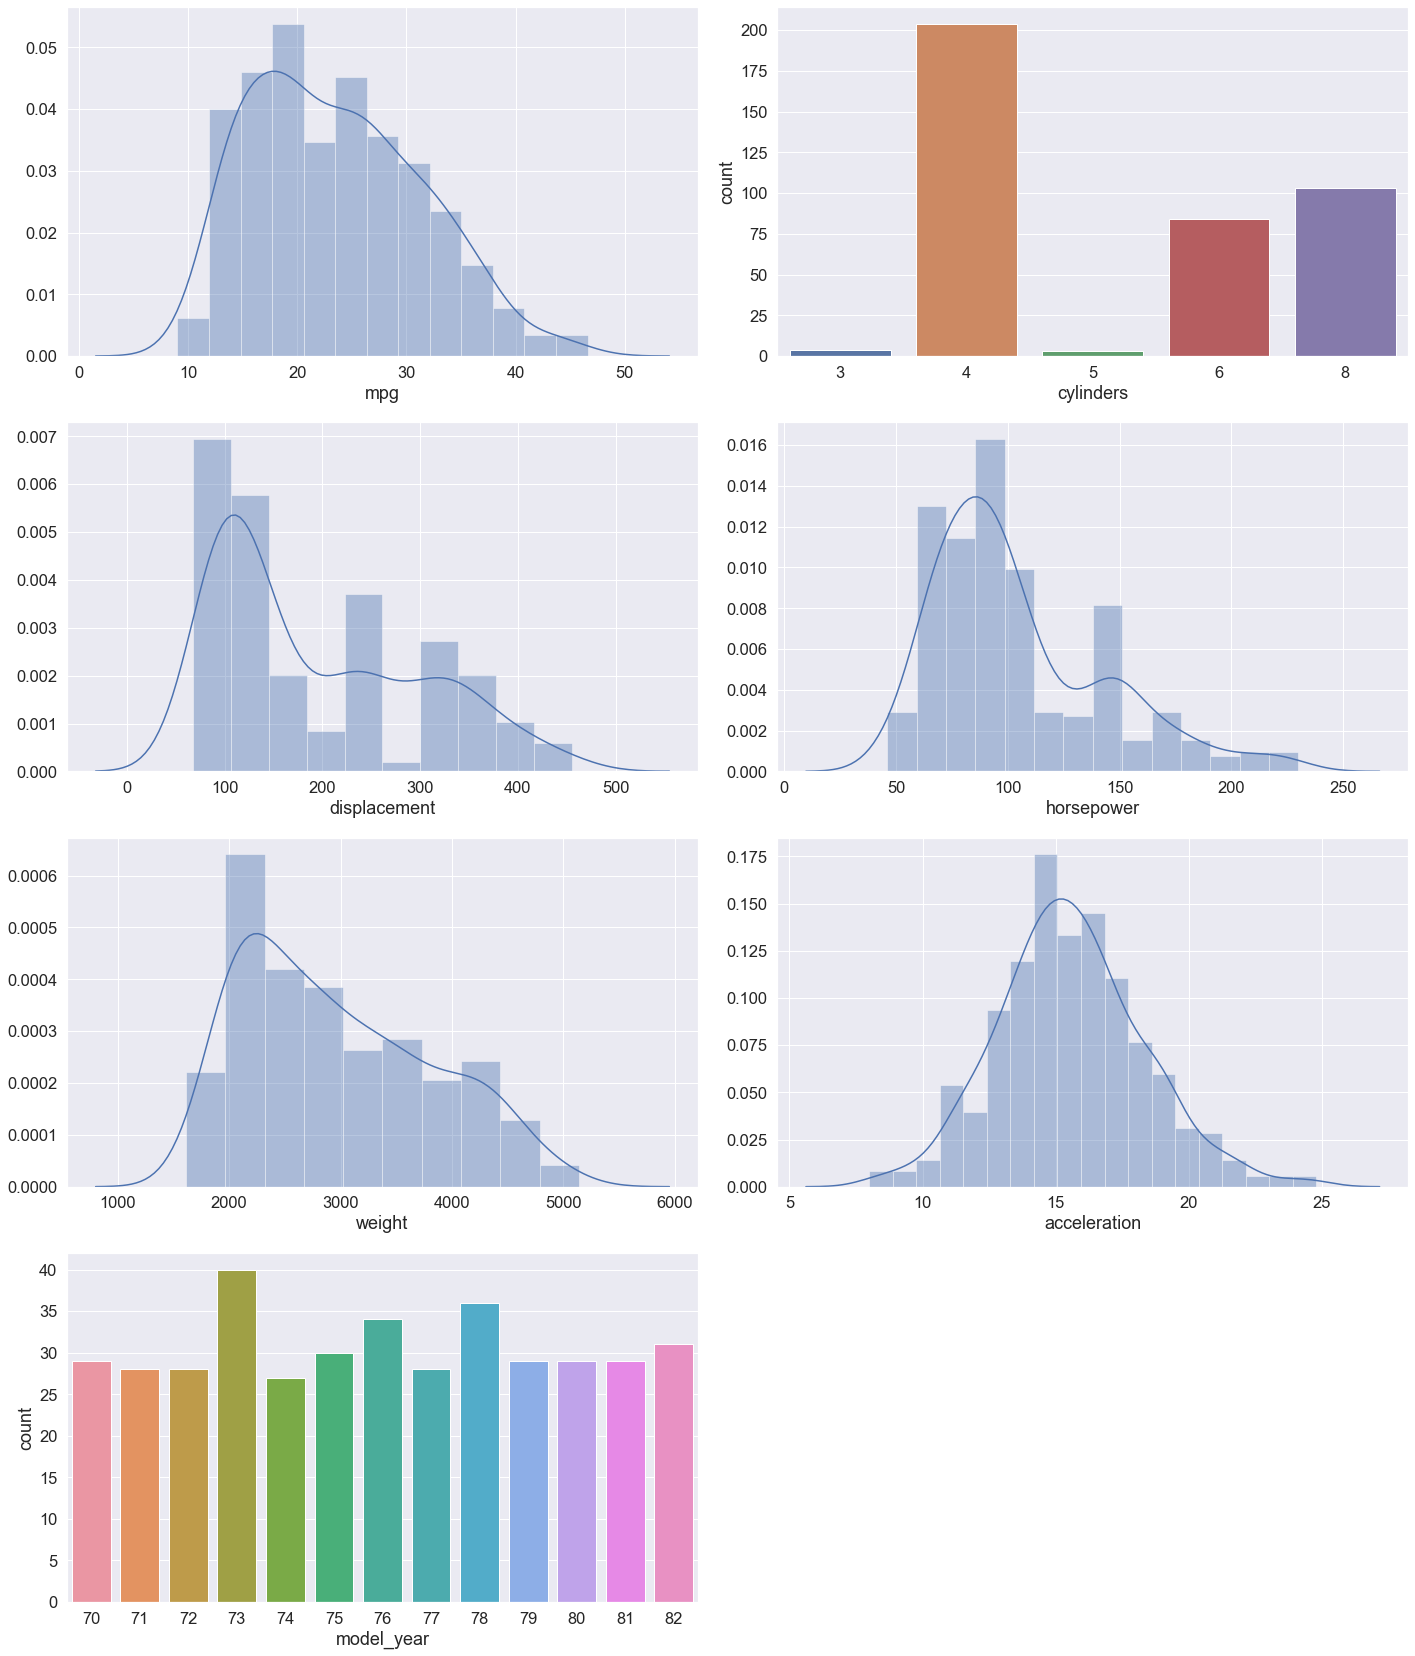

In [8]:
fig = plt.figure(figsize=(20,40))

plt.subplot(7,2,1)
sns.distplot(df.mpg)
plt.subplot(7,2,2)
sns.countplot(df.cylinders)
plt.subplot(7,2,3)
sns.distplot(df.displacement)
plt.subplot(7,2,4)
sns.distplot(df.horsepower)
plt.subplot(7,2,5)
sns.distplot(df.weight)
plt.subplot(7,2,6)
sns.distplot(df.acceleration)
plt.subplot(7,2,7)
sns.countplot(df.model_year)
# plt.subplot(7,2,8)
# sns.countplot()
# plt.subplot(7,2,9)
# sns.countplot()
# plt.subplot(7,2,10)
# sns.countplot()
# plt.subplot(7,2,11)
# sns.countplot()
# plt.subplot(7,2,12)
# sns.countplot()
# plt.subplot(7,2,13)
# sns.countplot()
# plt.subplot(7,2,14)
# sns.countplot()

plt.tight_layout()
plt.show()

### Bivariate Data Exploration

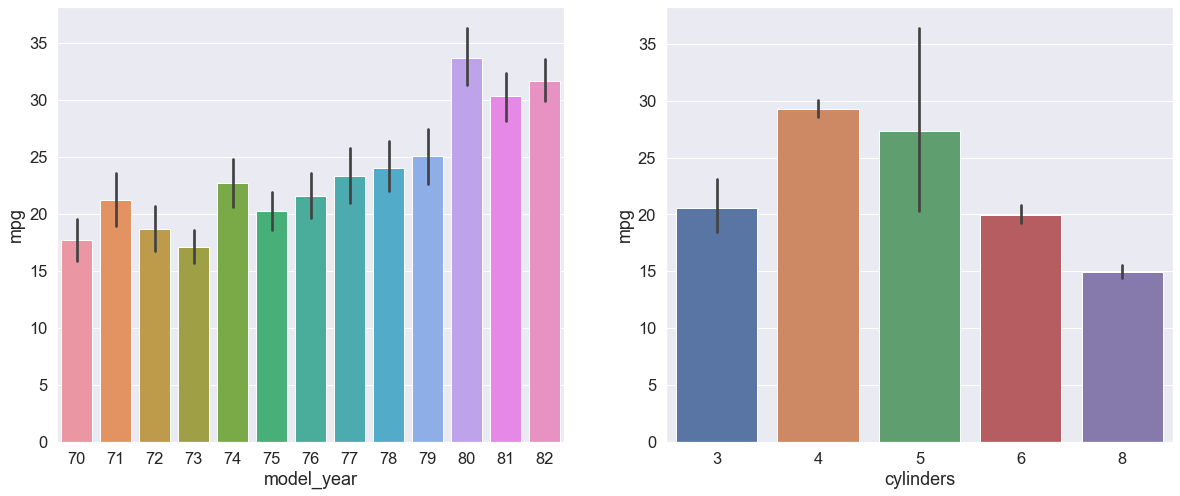

In [9]:
fig = plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.barplot(x='model_year', y='mpg',data=df)
plt.subplot(1,2,2)
sns.barplot(x='cylinders', y='mpg',data=df)

plt.show()

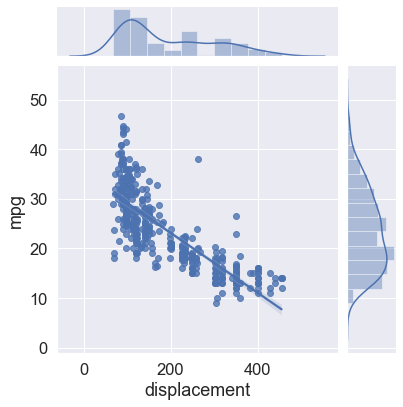

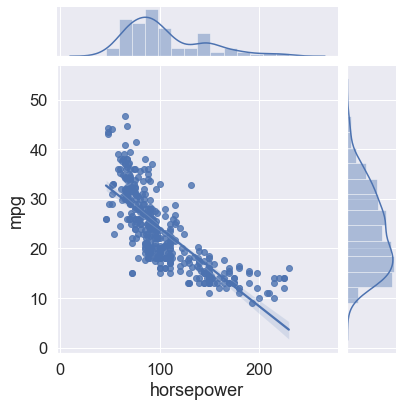

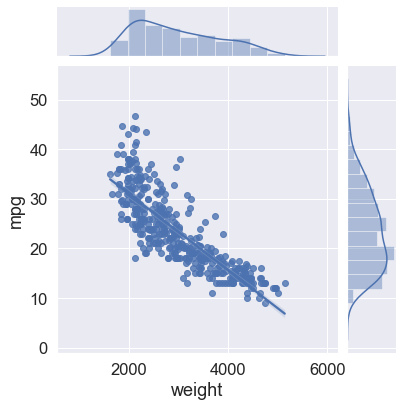

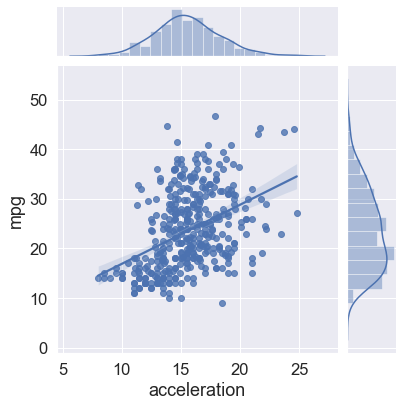

In [10]:
sns.jointplot(x='displacement', y='mpg',data=df, kind='reg')

sns.jointplot(x='horsepower', y='mpg',data=df, kind='reg')

sns.jointplot(x='weight', y='mpg',data=df, kind='reg')

sns.jointplot(x='acceleration', y='mpg',data=df, kind='reg')

plt.show()

In [11]:
df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


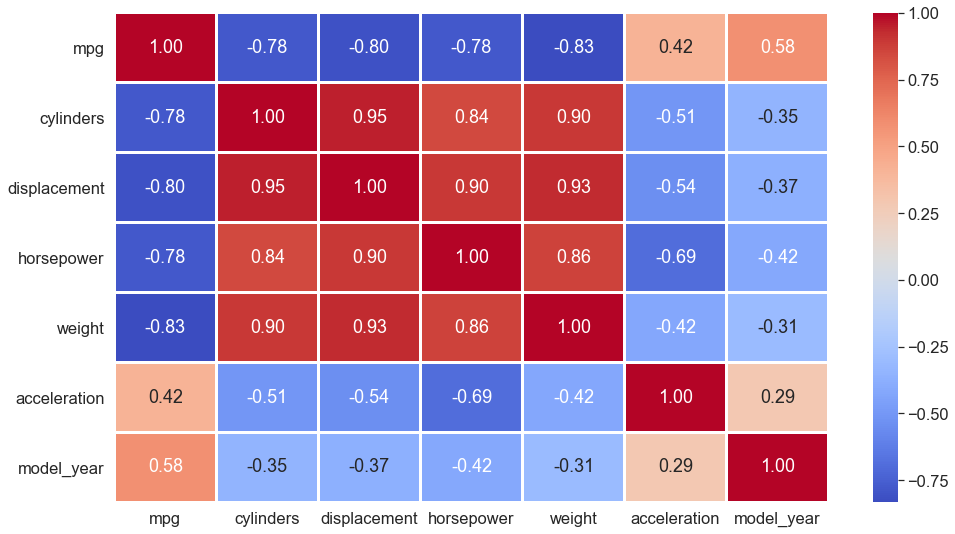

In [12]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.show()

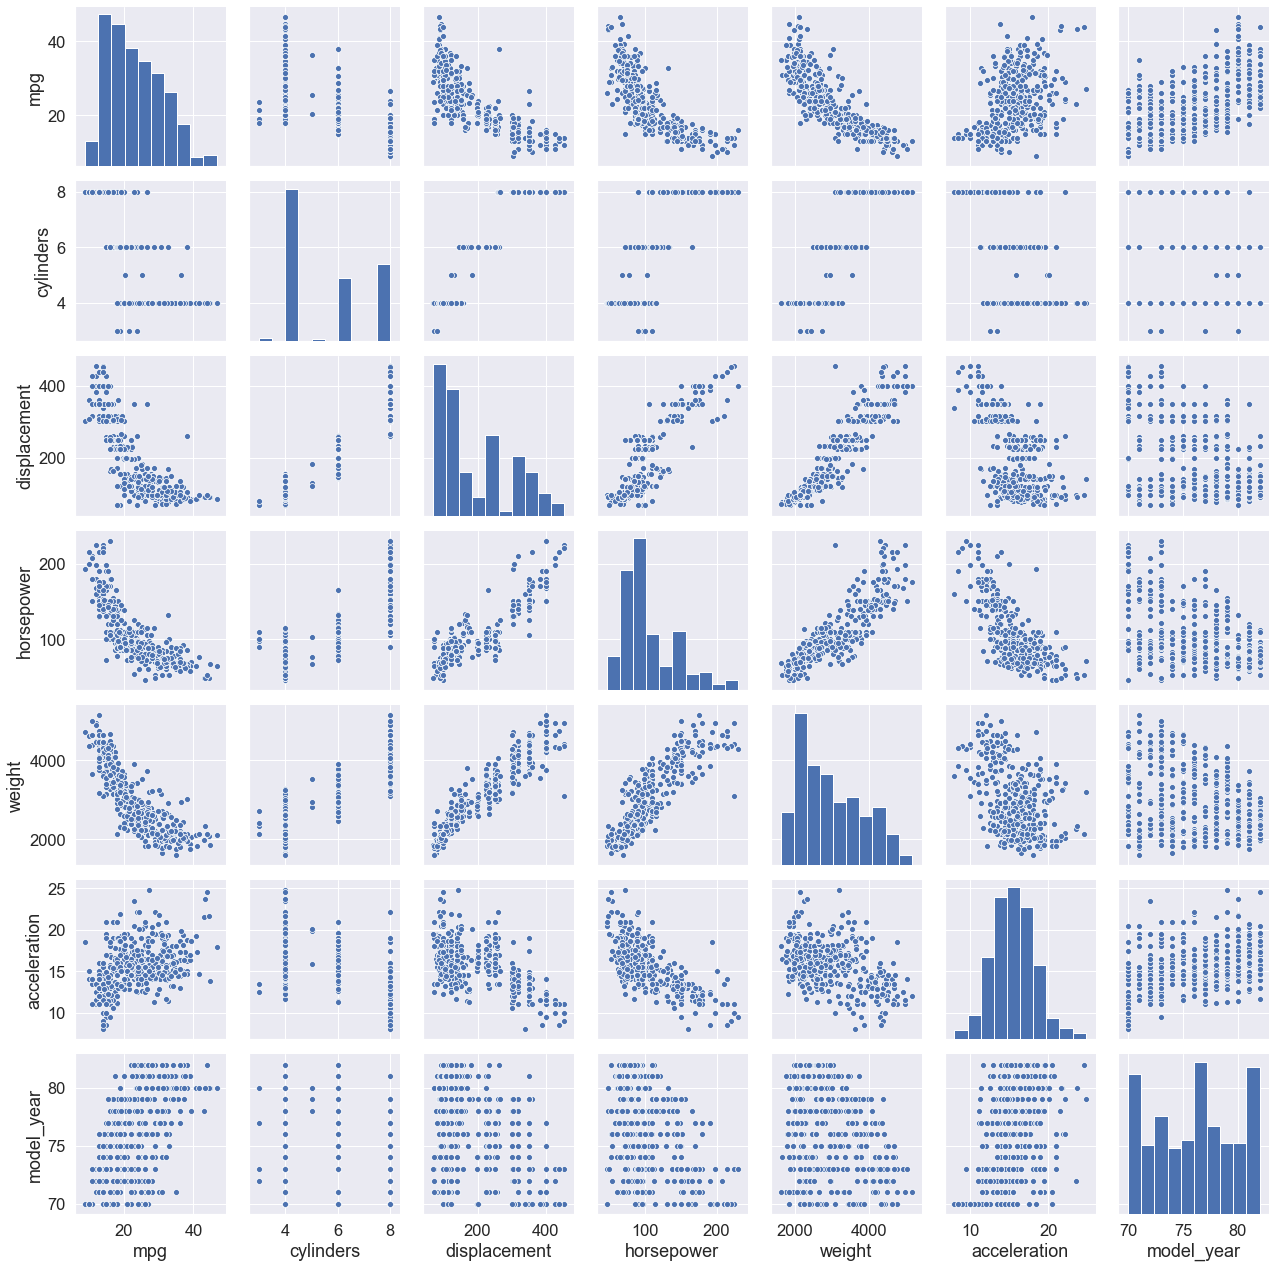

In [13]:
sns.pairplot(df)
plt.show()

### Data Preprocessing

### Treat Missing Values

In [14]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
car_name        0
dtype: int64

In [15]:
imputer = mdi.MeanMedianImputer(imputation_method='median',variables='horsepower')

In [16]:
imputer.fit(df)

MeanMedianImputer(imputation_method='median', variables=['horsepower'])

In [17]:
df = imputer.transform(df)

In [18]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
car_name        0
dtype: int64

### Treat Duplicate Values

In [19]:
df.duplicated(keep='first').sum()

0

### Treat Imbalance Data

### Treat Outliers

In [20]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'car_name'],
      dtype='object')

In [21]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.304020,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.222625,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [22]:
windsorizer = Winsorizer(distribution='skewed',tail='both',fold=1.5,
                         variables=['displacement', 'horsepower', 'weight','acceleration'])

In [23]:
windsorizer.fit(df)

Winsorizer(distribution='skewed', fold=1.5, tail='both',
           variables=['displacement', 'horsepower', 'weight', 'acceleration'])

In [24]:
df2 = windsorizer.transform(df)

In [25]:
df2

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,car_name
0,18.0,6,258.0,110.0,2962.0,13.5,71,amc hornet sportabout (sw)
1,34.0,4,108.0,70.0,2245.0,16.9,82,toyota corolla
2,18.2,8,318.0,135.0,3830.0,15.2,79,dodge st. regis
3,32.3,4,97.0,67.0,2065.0,17.8,81,subaru
4,14.0,8,400.0,175.0,4385.0,12.0,72,pontiac catalina
...,...,...,...,...,...,...,...,...
393,36.0,4,98.0,70.0,2125.0,17.3,82,mercury lynx l
394,25.0,6,181.0,110.0,2945.0,16.4,82,buick century limited
395,36.0,4,135.0,84.0,2370.0,13.0,82,dodge charger 2.2
396,44.0,4,97.0,52.0,2130.0,22.2,82,vw pickup


In [26]:
df2.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,103.790201,2970.424623,15.552010,76.010050
std,7.815984,1.701004,104.269838,36.770468,846.841774,2.693089,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.800000,70.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,198.500000,5140.000000,22.200000,82.000000


In [27]:
windsorizer.left_tail_caps_

{'displacement': -132.375,
 'horsepower': 2.5,
 'weight': 147.375,
 'acceleration': 8.800000000000008}

In [28]:
windsorizer.right_tail_caps_

{'displacement': 498.625,
 'horsepower': 198.5,
 'weight': 5684.375,
 'acceleration': 22.199999999999992}

### Treat Data Types

In [29]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   car_name      398 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 25.0+ KB


### Drop unwanted features

In [30]:
df2.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'car_name'],
      dtype='object')

In [31]:
df2.drop(['model_year', 'car_name'],axis=1,inplace=True)

In [32]:
df2

,mpg,cylinders,displacement,horsepower,weight,acceleration
0,18.0,6,258.0,110.0,2962.0,13.5
1,34.0,4,108.0,70.0,2245.0,16.9
2,18.2,8,318.0,135.0,3830.0,15.2
3,32.3,4,97.0,67.0,2065.0,17.8
4,14.0,8,400.0,175.0,4385.0,12.0
...,...,...,...,...,...,...
393,36.0,4,98.0,70.0,2125.0,17.3
394,25.0,6,181.0,110.0,2945.0,16.4
395,36.0,4,135.0,84.0,2370.0,13.0
396,44.0,4,97.0,52.0,2130.0,22.2


In [33]:
df2 = df2[['cylinders', 'displacement', 'horsepower', 'weight','acceleration','mpg']]

In [34]:
df2

,cylinders,displacement,horsepower,weight,acceleration,mpg
0,6,258.0,110.0,2962.0,13.5,18.0
1,4,108.0,70.0,2245.0,16.9,34.0
2,8,318.0,135.0,3830.0,15.2,18.2
3,4,97.0,67.0,2065.0,17.8,32.3
4,8,400.0,175.0,4385.0,12.0,14.0
...,...,...,...,...,...,...
393,4,98.0,70.0,2125.0,17.3,36.0
394,6,181.0,110.0,2945.0,16.4,25.0
395,4,135.0,84.0,2370.0,13.0,36.0
396,4,97.0,52.0,2130.0,22.2,44.0


In [35]:
#df2.to_csv("cartrain.csv",index=False)

### Train Test Split

In [36]:
X = df2.iloc[:,0:5]
y = df2.iloc[:,5]

In [37]:
X.values, y.values

(array([[   6. ,  258. ,  110. , 2962. ,   13.5],
        [   4. ,  108. ,   70. , 2245. ,   16.9],
        [   8. ,  318. ,  135. , 3830. ,   15.2],
        ...,
        [   4. ,  135. ,   84. , 2370. ,   13. ],
        [   4. ,   97. ,   52. , 2130. ,   22.2],
        [   4. ,  120. ,   79. , 2625. ,   18.6]]),
 array([18. , 34. , 18.2, 32.3, 14. , 13. , 25. , 16. , 23. , 32.9, 25. ,
        38.1, 16. , 16. , 39.4, 24. , 23. , 25.8, 27. , 25.5, 32. , 15. ,
        13. , 21. , 21. , 20.2, 30. , 20.2, 17. , 17.5, 20. , 15. ,  9. ,
        27.2, 19. , 21. , 29. , 19. , 15.5, 25. , 34.4, 14. , 23. , 16.2,
        20. , 21. , 18. , 19. , 17.5, 18. , 21. , 34.5, 21.1, 26.6, 26.6,
        16. , 13. , 18.5, 28.1, 23.9, 19. , 43.1, 29. , 37. , 30. , 30.5,
        15. , 20.5, 14. , 16.5, 23.6, 13. , 16.9, 28. , 18.1, 22. , 22.5,
        19.9, 24. , 28. , 19. , 18. , 15. , 40.9, 17.5, 27.2, 15. , 18. ,
        19.2, 20. , 29. , 15. , 29. , 23. , 19.8, 16. , 18. , 30. , 31. ,
        33. , 11. ,

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [39]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((318, 5), (80, 5), (318,), (80,))

### Feature Scaling

In [40]:
X_train

,cylinders,displacement,horsepower,weight,acceleration
64,4,79.0,70.0,2074.0,19.5
55,8,304.0,150.0,3433.0,12.0
317,4,121.0,76.0,2511.0,18.0
102,8,351.0,149.0,4335.0,14.5
358,8,302.0,139.0,3570.0,12.8
...,...,...,...,...,...
323,4,68.0,49.0,1867.0,19.5
192,4,134.0,95.0,2560.0,14.2
117,8,400.0,180.0,4220.0,11.1
47,4,120.0,88.0,3270.0,21.9


In [41]:
minmax = MinMaxScaler()

In [42]:
X_train_scaled = minmax.fit_transform(X_train)

In [43]:
X_train_scaled 

array([[0.2       , 0.02842377, 0.15737705, 0.13794135, 0.79850746],
       [1.        , 0.60981912, 0.68196721, 0.54458408, 0.23880597],
       [0.2       , 0.1369509 , 0.19672131, 0.26870138, 0.68656716],
       ...,
       [1.        , 0.85788114, 0.87868852, 0.78007181, 0.17164179],
       [0.2       , 0.13436693, 0.27540984, 0.49581089, 0.97761194],
       [0.2       , 0.13178295, 0.33442623, 0.23698384, 0.45522388]])

In [44]:
X_test_scaled = minmax.transform(X_test)

In [45]:
X_test_scaled

array([[0.2       , 0.0749354 , 0.20983607, 0.17265111, 0.39552239],
       [0.6       , 0.42118863, 0.45245902, 0.48833034, 0.49253731],
       [0.6       , 0.49095607, 0.4852459 , 0.53770197, 0.47014925],
       [0.2       , 0.13436693, 0.33442623, 0.26211849, 0.46268657],
       [0.        , 0.00516796, 0.33442623, 0.21454219, 0.35074627],
       [0.2       , 0.21447028, 0.24918033, 0.30580491, 0.56716418],
       [1.        , 0.73126615, 0.60327869, 0.70077798, 0.32835821],
       [0.6       , 0.42377261, 0.35409836, 0.38539797, 0.53731343],
       [0.6       , 0.47028424, 0.35409836, 0.64871335, 0.6119403 ],
       [0.2       , 0.04392765, 0.15737705, 0.1128067 , 0.6119403 ],
       [0.2       , 0.05684755, 0.19016393, 0.1481149 , 0.5       ],
       [0.2       , 0.0749354 , 0.09180328, 0.06612807, 0.76119403],
       [1.        , 0.64599483, 1.        , 0.82854578, 0.35074627],
       [1.        , 0.49612403, 0.28852459, 0.5406942 , 1.        ],
       [0.2       , 0.18604651, 0.

### Model Training

### Using XGBoost

In [46]:
xgbmodel = XGBRegressor(random_state=0, n_estimators=100, objective='reg:squarederror')

In [47]:
xgbmodel.fit(X_train_scaled,y_train,eval_set=[(X_test_scaled,y_test)],eval_metric='rmse',early_stopping_rounds=10)

[0]	validation_0-rmse:21.1828
Will train until validation_0-rmse hasn't improved in 10 rounds.
[1]	validation_0-rmse:19.1148
[2]	validation_0-rmse:17.1974
[3]	validation_0-rmse:15.4597
[4]	validation_0-rmse:13.9166
[5]	validation_0-rmse:12.5104
[6]	validation_0-rmse:11.3432
[7]	validation_0-rmse:10.2884
[8]	validation_0-rmse:9.31134
[9]	validation_0-rmse:8.47974
[10]	validation_0-rmse:7.70408
[11]	validation_0-rmse:7.07869
[12]	validation_0-rmse:6.47548
[13]	validation_0-rmse:5.94667
[14]	validation_0-rmse:5.52834
[15]	validation_0-rmse:5.13216
[16]	validation_0-rmse:4.8225
[17]	validation_0-rmse:4.54769
[18]	validation_0-rmse:4.29943
[19]	validation_0-rmse:4.13316
[20]	validation_0-rmse:3.97222
[21]	validation_0-rmse:3.84523
[22]	validation_0-rmse:3.74543
[23]	validation_0-rmse:3.66048
[24]	validation_0-rmse:3.604
[25]	validation_0-rmse:3.55003
[26]	validation_0-rmse:3.51111
[27]	validation_0-rmse:3.48084
[28]	validation_0-rmse:3.44315
[29]	validation_0-rmse:3.43386
[30]	validation_0-

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [48]:
y_pred = xgbmodel.predict(X_test_scaled)

In [49]:
y_pred

array([29.020256, 18.454763, 17.920547, 24.867037, 23.251734, 25.875153,
       15.374959, 19.377638, 16.448431, 31.561163, 30.279724, 32.5375  ,
       13.627652, 22.643877, 25.875153, 32.386642, 26.737976, 30.507053,
       14.129304, 21.996874, 14.025009, 27.996737, 24.495564, 19.211843,
       15.781928, 18.341429, 27.996737, 17.929544, 30.303555, 12.690403,
       29.702538, 13.08776 , 33.457573, 12.858817, 28.154474, 22.02206 ,
       23.66503 , 18.37072 , 34.54406 , 30.721428, 30.528362, 28.619793,
       33.111923, 18.593327, 25.572302, 30.584068, 25.181908, 12.858817,
       14.254387, 17.77709 , 14.358247, 16.167665, 15.478819, 24.809713,
       24.940338, 30.33543 , 25.807285, 23.149887, 30.860502, 13.796066,
       16.167665, 23.12875 , 17.282305, 30.600367, 25.15016 , 15.781928,
       12.858817, 14.358247, 34.124065, 14.358247, 31.175695, 14.358247,
       33.720123, 26.50002 , 30.3024  , 17.157663, 29.824724, 29.41065 ,
       15.630305, 21.331936], dtype=float32)

### Model Evaluation

In [50]:
mse = mean_squared_error(y_test,y_pred)
mse

11.310543124307506

In [51]:
rmse = np.sqrt(mse)
rmse

3.3631150923373863

In [52]:
r2score = r2_score(y_test,y_pred)
r2score

0.7947751195391756

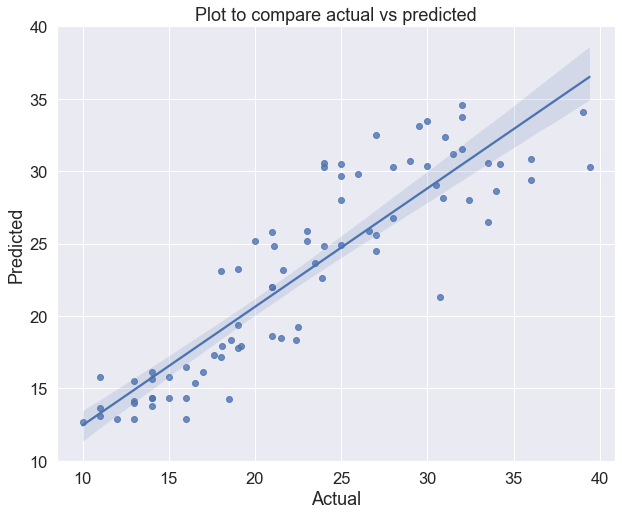

In [53]:
fig, ax = plt.subplots(figsize=(10,8))
sns.regplot(x=y_test, y=y_pred, ax=ax)
plt.title("Plot to compare actual vs predicted")
plt.ylabel("Predicted")
plt.xlabel("Actual")
plt.show()

### Available importance_types = [‘weight’, ‘gain’, ‘cover’, ‘total_gain’, ‘total_cover’]

In [54]:
X.columns

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration'], dtype='object')

In [55]:
xgbmodel.get_booster().feature_names = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']

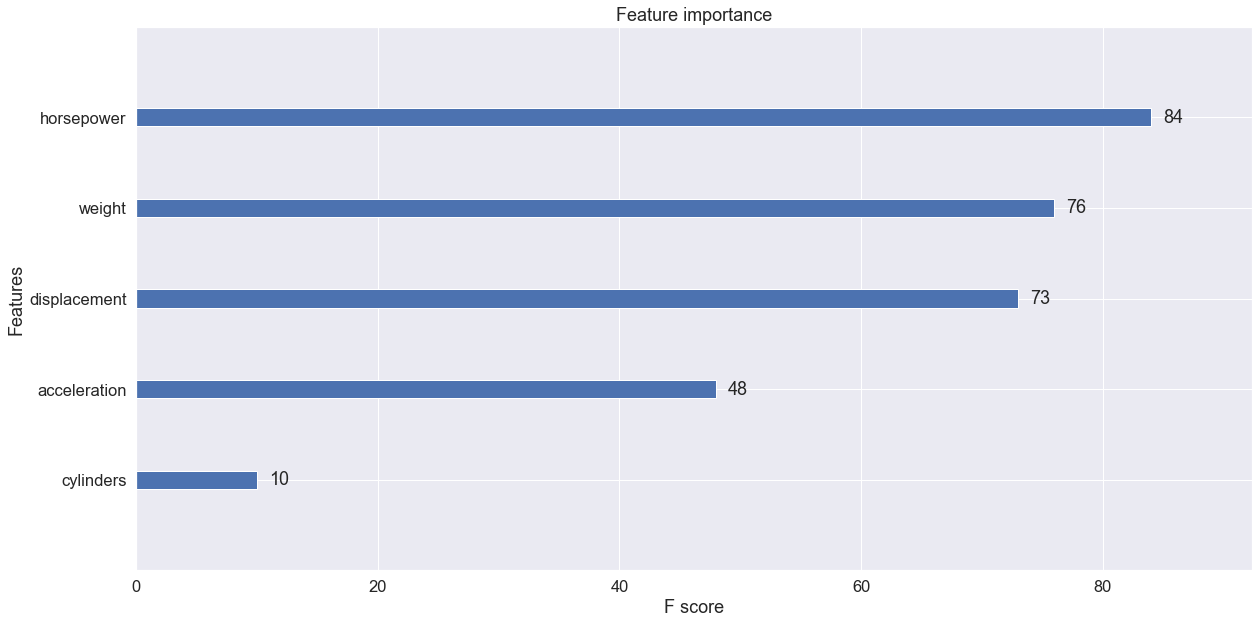

In [56]:
fig, ax = plt.subplots(figsize=(20,10))
xgb.plot_importance(xgbmodel.get_booster(),ax=ax)
plt.show()

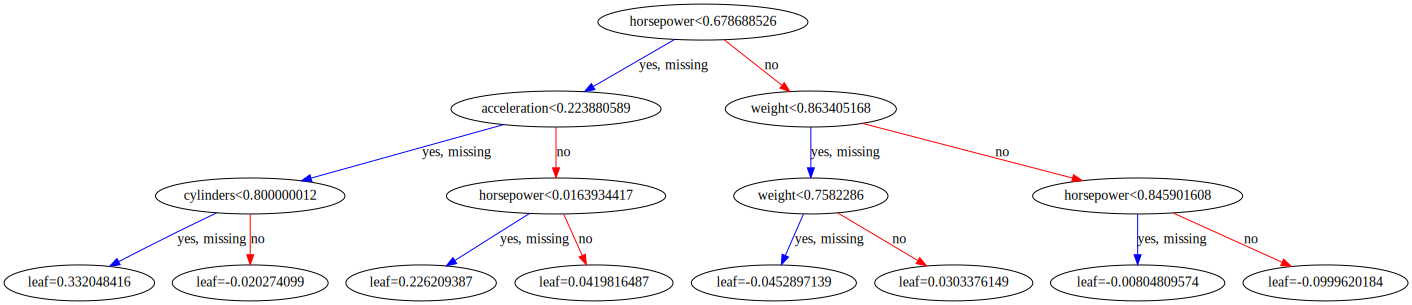

In [57]:
xgb.to_graphviz(xgbmodel,num_trees=40)

Example:

f = 'gain'

XGBClassifier.get_booster().get_score(importance_type= f)

### Cross-Validation

In [58]:
cv = cross_val_score(xgbmodel,X,y,cv=5,verbose=1,scoring='r2')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


In [59]:
cv.mean()

0.7372246987097274

### Model Tuning

In [60]:
model = XGBRegressor(random_state=0, n_estimators=100, objective='reg:squarederror')

In [61]:
parameters = {'max_depth': np.arange(3,10,1),
              'learning rate': np.arange(0.05,0.3,0.03),
              'n_estimators':np.arange(100,1000,100),
              'min_child_weight': np.arange(1,4,1),
              'gamma':np.arange(0,50,2),
              'subsample':np.arange(0.5,0.9,0.1),
              'colsample_bytree':np.arange(0.5,0.9,0.1)
             }

In [62]:
randm = RandomizedSearchCV(estimator=model, param_distributions = parameters, cv = 5, n_iter = 50, 
                           n_jobs=-1, scoring='r2')

In [63]:
randm.fit(X, y)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:squarederror',
                                          random_state=0, reg_...
       34, 36, 38, 40, 42, 44, 46, 48]),
                                        'learning rate': array([0.05, 0.08, 0.11, 0.14, 0.17, 0.2 , 0.23, 0.26, 0.29]),
                           

In [64]:
randm.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=42,
             importance_type='gain', learning rate=0.08, learning_rate=0.1,
             max_delta_step=0, max_depth=4, min_child_weight=3, missing=None,
             n_estimators=200, n_jobs=1, nthread=None,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
             subsample=0.7, verbosity=1)

In [65]:
randm.best_score_

0.7385804453595345

In [66]:
randm.best_params_

{'subsample': 0.7,
 'n_estimators': 200,
 'min_child_weight': 3,
 'max_depth': 4,
 'learning rate': 0.08,
 'gamma': 42,
 'colsample_bytree': 0.5}

### Final Model

In [67]:
xgbnew = XGBRegressor(random_state=0, n_estimators=300, objective='reg:squarederror',max_depth=4,
                      gamma=48, min_child_weight=1,learning_rate=0.05,subsample=0.7,colsample_bytree=0.6)

In [68]:
xgbnew.fit(X_train_scaled,y_train,eval_set=[(X_test_scaled,y_test)],eval_metric='rmse',early_stopping_rounds=20)

[0]	validation_0-rmse:22.3519
Will train until validation_0-rmse hasn't improved in 20 rounds.
[1]	validation_0-rmse:21.2206
[2]	validation_0-rmse:20.1525
[3]	validation_0-rmse:19.1753
[4]	validation_0-rmse:18.2117
[5]	validation_0-rmse:17.344
[6]	validation_0-rmse:16.4811
[7]	validation_0-rmse:15.6529
[8]	validation_0-rmse:14.8996
[9]	validation_0-rmse:14.1622
[10]	validation_0-rmse:13.4555
[11]	validation_0-rmse:12.7914
[12]	validation_0-rmse:12.1516
[13]	validation_0-rmse:11.5598
[14]	validation_0-rmse:11.0096
[15]	validation_0-rmse:10.4713
[16]	validation_0-rmse:9.97233
[17]	validation_0-rmse:9.49866
[18]	validation_0-rmse:9.09301
[19]	validation_0-rmse:8.68336
[20]	validation_0-rmse:8.30299
[21]	validation_0-rmse:7.92524
[22]	validation_0-rmse:7.58809
[23]	validation_0-rmse:7.27668
[24]	validation_0-rmse:6.96967
[25]	validation_0-rmse:6.67474
[26]	validation_0-rmse:6.40237
[27]	validation_0-rmse:6.15573
[28]	validation_0-rmse:5.91916
[29]	validation_0-rmse:5.70604
[30]	validation_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, gamma=48,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=4, min_child_weight=1, missing=None, n_estimators=300,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=0.7, verbosity=1)

In [69]:
y_pred = xgbnew.predict(X_test_scaled)

In [70]:
y_pred

array([29.223196 , 18.734049 , 18.268492 , 25.48616  , 22.969471 ,
       27.49878  , 15.366141 , 20.229948 , 16.912683 , 32.998344 ,
       31.93099  , 33.743134 , 13.920962 , 21.046072 , 27.49878  ,
       33.020714 , 26.823505 , 29.715618 , 14.064313 , 23.08331  ,
       14.185489 , 28.792152 , 24.793692 , 19.245573 , 15.843239 ,
       18.31754  , 28.45386  , 17.859886 , 30.023819 , 13.27174  ,
       29.436539 , 13.536266 , 33.44382  , 13.27174  , 28.879744 ,
       22.850103 , 23.737564 , 18.587072 , 34.24837  , 30.430908 ,
       31.141043 , 29.38284  , 31.907692 , 19.081776 , 25.539934 ,
       31.005829 , 25.994034 , 13.27174  , 14.328839 , 18.340172 ,
       14.328839 , 15.774004 , 15.666888 , 25.601343 , 25.7092   ,
       31.828568 , 26.368263 , 23.67066  , 31.262938 , 13.920962 ,
       15.774004 , 23.391651 , 16.615908 , 30.190933 , 25.391073 ,
       15.6374035, 13.27174  , 14.328839 , 34.236595 , 14.328839 ,
       31.70358  , 14.328839 , 33.920124 , 26.289265 , 31.9839

In [71]:
r2score = r2_score(y_test,y_pred)

In [72]:
r2score

0.7856156127316323